# Analysis of Song Lyrics 

In [209]:
%matplotlib inline
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk      
nltk.download('all')
#natural language toolkit to analyze texts more efficiently
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction import text
import collections

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Harisu

[nltk_data]    |   Unzipping taggers\maxent_treebank_pos_tagger.zip.
[nltk_data]    | Downloading package moses_sample to
[nltk_data]    |     C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\moses_sample.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\movie_reviews.zip.
[nltk_data]    | Downloading package mte_teip5 to C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\mte_teip5.zip.
[nltk_data]    | Downloading package mwa_ppdb to C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping misc\mwa_ppdb.zip.
[nltk_data]    | Downloading package names to C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzippin

[nltk_data]    |   Unzipping corpora\switchboard.zip.
[nltk_data]    | Downloading package tagsets to C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping help\tagsets.zip.
[nltk_data]    | Downloading package timit to C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\timit.zip.
[nltk_data]    | Downloading package toolbox to C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\toolbox.zip.
[nltk_data]    | Downloading package treebank to C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\treebank.zip.
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\Harisudhan
[nltk_data]    |     Ramaswamy\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\twitter_samples.zip.
[nltk_data]    | Downloa

In [181]:
df1 = pd.read_csv("ts.csv")

df3 = pd.read_csv("rep.csv")
df4 = pd.read_csv("r.csv")
df5 = pd.read_csv("l.csv")
df6 = pd.read_csv("fo.csv")
df7 = pd.read_csv("f.csv")
df8 = pd.read_csv("e.csv")
df9 = pd.read_csv("1.csv")

In [182]:
li = [df2, df3, df4, df5, df6, df7, df8, df9]
for i in li:
      df1 = pd.merge(df1, i, on="album_name", how="outer")

C:\Users\Harisudhan Ramaswamy\AppData\Local\Temp\ipykernel_21120\2934400075.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'track_title_x', 'lyric_x', 'track_n_x', 'line_x'} in the result is deprecated and will raise a MergeError in a future version.
  df1 = pd.merge(df1, i, on="album_name", how="outer")
C:\Users\Harisudhan Ramaswamy\AppData\Local\Temp\ipykernel_21120\2934400075.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'track_title_x', 'lyric_x', 'track_n_x', 'line_x'} in the result is deprecated and will raise a MergeError in a future version.
  df1 = pd.merge(df1, i, on="album_name", how="outer")
C:\Users\Harisudhan Ramaswamy\AppData\Local\Temp\ipykernel_21120\2934400075.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'track_title_x', 'lyric_x', 'track_n_x', 'line_x'} in the result is deprecated and will raise a MergeError in a future version.
  df1 = pd.merge(df1, i, on="album_name", how="outer")


In [183]:
data = pd.read_csv("ts.csv")

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8360 entries, 0 to 8359
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   album_name   8358 non-null   object 
 1   track_title  8358 non-null   object 
 2   track_n      8358 non-null   float64
 3   lyric        8358 non-null   object 
 4   line         8358 non-null   float64
dtypes: float64(2), object(3)
memory usage: 326.7+ KB


In [185]:
data.isna().any(axis=1).sum()

2

In [186]:
data.shape

(8360, 5)

In [187]:
data.dropna(subset=['album_name', 'track_title', 'track_n', 'lyric', 'line' ], inplace=True)

In [188]:
data.shape

(8358, 5)

In [189]:
data.drop_duplicates()

,album_name,track_title,track_n,lyric,line
0,Taylor Swift,Tim McGraw,1.0,He said the way my blue eyes shined,1.0
1,Taylor Swift,Tim McGraw,1.0,Put those Georgia stars to shame that night,2.0
2,Taylor Swift,Tim McGraw,1.0,"I said, ""That's a lie""",3.0
3,Taylor Swift,Tim McGraw,1.0,Just a boy in a Chevy truck,4.0
4,Taylor Swift,Tim McGraw,1.0,That had a tendency of gettin' stuck,5.0
...,...,...,...,...,...
8355,1989 (Deluxe),New Romantics,16.0,Heartbreak is the national anthem,65.0
8356,1989 (Deluxe),New Romantics,16.0,We sing it proudly,66.0
8357,1989 (Deluxe),New Romantics,16.0,We are too busy dancing to get knocked off our...,67.0
8358,1989 (Deluxe),New Romantics,16.0,"Baby, we're the new romantics",68.0


In [190]:
print(data.album_name.unique())

['Taylor Swift' 'Speak Now (Deluxe)' 'reputation' 'Red (Deluxe Edition)'
 'Lover' 'folklore (deluxe version)' 'Fearless (Taylor’s Version)'
 'evermore (deluxe version)' '1989 (Deluxe)']


In [191]:
# Function to map the name of the album to the when it was released
def album_release(row):  
    if row['album_name'] == 'Taylor Swift':
        return '2006'
    elif row['album_name'] == 'Fearless (Taylor’s Version)':
        return '2008'
    elif row['album_name'] == 'Speak Now (Deluxe)':
        return '2010'
    elif row['album_name'] == 'Red (Deluxe Edition)':
        return '2012'
    elif row['album_name'] == '1989 (Deluxe)':
        return '2014'
    elif row['album_name'] == 'reputation':
        return '2017'
    elif row['album_name'] == 'Lover':
        return '2019'
    elif row['album_name'] == 'evermore (deluxe version)':
        return '2020'
    elif row['album_name'] == 'folklore (deluxe version)':
        return '2021'
    return 'No Date'

data['album_year'] = data.apply(lambda row: album_release(row), axis=1)
data.head()

,album_name,track_title,track_n,lyric,line,album_year
0,Taylor Swift,Tim McGraw,1.0,He said the way my blue eyes shined,1.0,2006
1,Taylor Swift,Tim McGraw,1.0,Put those Georgia stars to shame that night,2.0,2006
2,Taylor Swift,Tim McGraw,1.0,"I said, ""That's a lie""",3.0,2006
3,Taylor Swift,Tim McGraw,1.0,Just a boy in a Chevy truck,4.0,2006
4,Taylor Swift,Tim McGraw,1.0,That had a tendency of gettin' stuck,5.0,2006


In [192]:
data['clean_lyric'] = data['lyric'].str.lower()
data['clean_lyric']= data['clean_lyric'].str.replace('[^\w\s]','')
#removing stopwords
stop = ['the', 'a', 'an','this', 'that', 'to', 'is', 'am', 'was', 'were', 'be', 'being', 'been', 'another', 'for', 'nor', 'but', 'or', 'yet', 'so', 'in', 'under', 'towards', 'before', 'even', 'still', 'if', 'it']
data['clean_lyric'] = data['clean_lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

skl_stop = text.ENGLISH_STOP_WORDS
print(skl_stop)
#I shall not include all of these stop words because a lot of information goes away from the lyrics

frozenset({'side', 'never', 'please', 'nevertheless', 'least', 'moreover', 'seemed', 'bill', 'keep', 'eight', 'everyone', 'with', 'would', 'should', 'being', 'take', 'the', 'until', 'among', 'hers', 'as', 'myself', 'sincere', 'rather', 'both', 'on', 'through', 'have', 'how', 'become', 'he', 'mostly', 'we', 'detail', 'whereas', 'forty', 'fill', 'sometimes', 'call', 'behind', 'to', 'otherwise', 'where', 'noone', 'any', 'was', 'name', 'and', 'indeed', 'within', 'were', 'own', 'i', 'whether', 'several', 'amongst', 'in', 'it', 'his', 'de', 'hundred', 'there', 'from', 'somewhere', 'neither', 'always', 'inc', 'few', 'no', 'many', 'besides', 'alone', 'if', 'mine', 'whence', 'ten', 'full', 'latterly', 'about', 'towards', 'thru', 'what', 'whereby', 'eg', 'seeming', 'well', 'beyond', 'namely', 'therein', 'too', 'part', 'nothing', 'ever', 'yours', 'fire', 'top', 'amount', 'one', 'everything', 'via', 'some', 'must', 'yourself', 'front', 'someone', 'thus', 'although', 'afterwards', 'us', 'system', '

C:\Users\Harisudhan Ramaswamy\AppData\Local\Temp\ipykernel_21120\1159043833.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_lyric']= data['clean_lyric'].str.replace('[^\w\s]','')


In [193]:
data.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric
0,Taylor Swift,Tim McGraw,1.0,He said the way my blue eyes shined,1.0,2006,he said way my blue eyes shined
1,Taylor Swift,Tim McGraw,1.0,Put those Georgia stars to shame that night,2.0,2006,put those georgia stars shame night
2,Taylor Swift,Tim McGraw,1.0,"I said, ""That's a lie""",3.0,2006,i said thats lie
3,Taylor Swift,Tim McGraw,1.0,Just a boy in a Chevy truck,4.0,2006,just boy chevy truck
4,Taylor Swift,Tim McGraw,1.0,That had a tendency of gettin' stuck,5.0,2006,had tendency of gettin stuck


In [194]:
data['clean_lyric_list'] = data['clean_lyric'].apply(lambda x: x.split()) #tokenization 
#tokenizing the lyrics into tokenized list (basic split operation)
print(data['clean_lyric_list'].head())

0       [he, said, way, my, blue, eyes, shined]
1    [put, those, georgia, stars, shame, night]
2                         [i, said, thats, lie]
3                     [just, boy, chevy, truck]
4            [had, tendency, of, gettin, stuck]
Name: clean_lyric_list, dtype: object


In [195]:
#To count the number of times a word has been included in a song and creates a column with the word to be searched
def count_word(word):
    data[word] = data['clean_lyric'].str.contains(word)
    s = sum(data[word])
    data.drop(columns=[word], inplace=True) #unnecessary column to keep 
    return s
word = input("Enter the word you want to search....")
print(count_word(word))

Enter the word you want to search....life
69


In [196]:
data

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,clean_lyric_list
0,Taylor Swift,Tim McGraw,1.0,He said the way my blue eyes shined,1.0,2006,he said way my blue eyes shined,"[he, said, way, my, blue, eyes, shined]"
1,Taylor Swift,Tim McGraw,1.0,Put those Georgia stars to shame that night,2.0,2006,put those georgia stars shame night,"[put, those, georgia, stars, shame, night]"
2,Taylor Swift,Tim McGraw,1.0,"I said, ""That's a lie""",3.0,2006,i said thats lie,"[i, said, thats, lie]"
3,Taylor Swift,Tim McGraw,1.0,Just a boy in a Chevy truck,4.0,2006,just boy chevy truck,"[just, boy, chevy, truck]"
4,Taylor Swift,Tim McGraw,1.0,That had a tendency of gettin' stuck,5.0,2006,had tendency of gettin stuck,"[had, tendency, of, gettin, stuck]"
...,...,...,...,...,...,...,...,...
8355,1989 (Deluxe),New Romantics,16.0,Heartbreak is the national anthem,65.0,2014,heartbreak national anthem,"[heartbreak, national, anthem]"
8356,1989 (Deluxe),New Romantics,16.0,We sing it proudly,66.0,2014,we sing proudly,"[we, sing, proudly]"
8357,1989 (Deluxe),New Romantics,16.0,We are too busy dancing to get knocked off our...,67.0,2014,we are too busy dancing get knocked off our feet,"[we, are, too, busy, dancing, get, knocked, of..."
8358,1989 (Deluxe),New Romantics,16.0,"Baby, we're the new romantics",68.0,2014,baby new romantics,"[baby, new, romantics]"


In [197]:
#List of related words
night = ['night','midnight', 'dawn', 'dusk', 'evening', 'late', 'dark', '1am', '2am', '3am', '4am', '10pm', '11pm', '12pm']
day = ['day', 'morning', 'light', 'sun', 'dawn', 'noon', 'golden', 'bright', 'fresh start', 'before noon', '6am', '9am']
time = ['today', 'tomorrow', 'yesterday', 'now', 'ago', 'previous day', 'day before', 'day after']
#regex and column creation 
night_regex = '|'.join(night)
day_regex = '|'.join(day)
time_regex = '|'.join(time)
data['night'] = data['clean_lyric'].str.contains(night_regex)
data['day'] = data['clean_lyric'].str.contains(day_regex)
data['time'] = data['clean_lyric'].str.contains(time_regex)

#counting the frequency of appearance
night_count = sum(data['night'])
day_count = sum(data['day'])
time_count = sum(data['time'])
print(" night words: ", night_count,"\n day words: ", day_count,"\n time words: ", time_count )


 night words:  240 
 day words:  363 
 time words:  813


In [198]:
#Another example
girl = ['girl', 'woman', 'female', 'lady', 'feminine', 'feminist', 'daughter', 'kid', 'pixie', 'tomboy', 'maiden', 'sister', 'sis', 'miss', 'virgin', 'senorita']
baby = ['baby', 'toddler', 'kid', 'child', 'kiddo', 'young', 'person', 'born']
love = ['love', 'respect', 'regard', 'like', 'affection', 'care', 'kiss', 'sex', 'hug', 'adore', 'cherish', 'admire']
girl_regex = '|'.join(girl)
baby_regex = '|'.join(baby)
love_regex = '|'.join(love)
data['girl'] = data['clean_lyric'].str.contains(girl_regex)
data['baby'] = data['clean_lyric'].str.contains(baby_regex)
data['love'] = data['clean_lyric'].str.contains(love_regex)

girl_count = sum(data['girl'])
baby_count = sum(data['baby'])
love_count = sum(data['love'])
print(" girl words: ", girl_count,"\n baby words: ", baby_count,"\n love words: ", love_count )


 girl words:  198 
 baby words:  235 
 love words:  862


In [199]:
data.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,clean_lyric_list,night,day,time,girl,baby,love
0,Taylor Swift,Tim McGraw,1.0,He said the way my blue eyes shined,1.0,2006,he said way my blue eyes shined,"[he, said, way, my, blue, eyes, shined]",False,False,False,False,False,False
1,Taylor Swift,Tim McGraw,1.0,Put those Georgia stars to shame that night,2.0,2006,put those georgia stars shame night,"[put, those, georgia, stars, shame, night]",True,False,False,False,False,False
2,Taylor Swift,Tim McGraw,1.0,"I said, ""That's a lie""",3.0,2006,i said thats lie,"[i, said, thats, lie]",False,False,False,False,False,False
3,Taylor Swift,Tim McGraw,1.0,Just a boy in a Chevy truck,4.0,2006,just boy chevy truck,"[just, boy, chevy, truck]",False,False,False,False,False,False
4,Taylor Swift,Tim McGraw,1.0,That had a tendency of gettin' stuck,5.0,2006,had tendency of gettin stuck,"[had, tendency, of, gettin, stuck]",False,False,False,False,False,False


In [200]:
#creating a new df for yearly mentions 
yearly_mentions = data.groupby('album_year').sum().reset_index()
yearly_mentions.drop(columns=['track_n', 'line'], inplace=True)
yearly_mentions

,album_year,night,day,time,girl,baby,love
0,2006,19,25,58,15,15,39
1,2008,42,65,134,29,54,114
2,2010,31,53,115,25,16,105
3,2012,48,53,138,41,9,146
4,2014,27,41,80,22,47,113
5,2017,25,25,54,16,41,78
6,2019,22,46,76,13,31,127
7,2020,18,38,96,15,10,67
8,2021,8,17,62,22,12,73


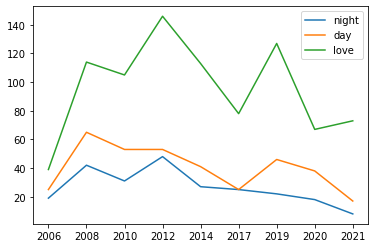

In [201]:
plt.plot(yearly_mentions['album_year'], yearly_mentions['night'], label='night')
plt.plot(yearly_mentions['album_year'], yearly_mentions['day'], label='day')
plt.plot(yearly_mentions['album_year'], yearly_mentions['love'], label='love')
plt.legend()
plt.show()

In [202]:
yearly_mentions.sort_values(by='love', ascending=False)
#albums where the word was used most frequently (descending)

,album_year,night,day,time,girl,baby,love
3,2012,48,53,138,41,9,146
6,2019,22,46,76,13,31,127
1,2008,42,65,134,29,54,114
4,2014,27,41,80,22,47,113
2,2010,31,53,115,25,16,105
5,2017,25,25,54,16,41,78
8,2021,8,17,62,22,12,73
7,2020,18,38,96,15,10,67
0,2006,19,25,58,15,15,39


In [203]:
word_list = [word for list_ in data['clean_lyric_list'] for word in list_]
#list of words and their frequency (desc order)
word_frequency = collections.Counter(word_list)
word_frequency = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)
word_frequency

[('you', 2835),
 ('i', 2635),
 ('and', 1712),
 ('me', 1063),
 ('my', 816),
 ('your', 623),
 ('of', 592),
 ('all', 531),
 ('im', 501),
 ('we', 498),
 ('like', 488),
 ('on', 467),
 ('know', 456),
 ('oh', 411),
 ('dont', 406),
 ('when', 392),
 ('its', 380),
 ('never', 353),
 ('youre', 343),
 ('just', 339),
 ('now', 305),
 ('with', 302),
 ('love', 295),
 ('what', 284),
 ('up', 272),
 ('out', 270),
 ('back', 267),
 ('time', 261),
 ('cause', 253),
 ('at', 249),
 ('are', 225),
 ('no', 213),
 ('one', 201),
 ('got', 201),
 ('see', 199),
 ('say', 198),
 ('do', 195),
 ('think', 192),
 ('baby', 188),
 ('go', 181),
 ('want', 181),
 ('down', 181),
 ('they', 173),
 ('come', 172),
 ('could', 167),
 ('can', 164),
 ('there', 162),
 ('not', 162),
 ('wanna', 161),
 ('cant', 157),
 ('ill', 156),
 ('right', 155),
 ('said', 146),
 ('have', 146),
 ('yeah', 145),
 ('he', 144),
 ('ever', 140),
 ('would', 140),
 ('had', 134),
 ('thats', 133),
 ('look', 133),
 ('get', 127),
 ('how', 122),
 ('stay', 122),
 ('here'

In [210]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("I do not like the way people look at me!!")

{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.4007}

In [211]:
sia.polarity_scores("I love my family very much!!!!!")

{'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'compound': 0.7482}

In [212]:
data['polarity'] = data['clean_lyric'].apply(lambda x: sia.polarity_scores(x))
data[['neg', 'neu', 'pos', 'compound']] = data['polarity'].apply(pd.Series)
data.drop('polarity', axis=1)
data.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,clean_lyric_list,night,day,time,girl,baby,love,polarity,neg,neu,pos,compound
0,Taylor Swift,Tim McGraw,1.0,He said the way my blue eyes shined,1.0,2006,he said way my blue eyes shined,"[he, said, way, my, blue, eyes, shined]",False,False,False,False,False,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
1,Taylor Swift,Tim McGraw,1.0,Put those Georgia stars to shame that night,2.0,2006,put those georgia stars shame night,"[put, those, georgia, stars, shame, night]",True,False,False,False,False,False,"{'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'comp...",0.383,0.617,0.0,-0.4767
2,Taylor Swift,Tim McGraw,1.0,"I said, ""That's a lie""",3.0,2006,i said thats lie,"[i, said, thats, lie]",False,False,False,False,False,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
3,Taylor Swift,Tim McGraw,1.0,Just a boy in a Chevy truck,4.0,2006,just boy chevy truck,"[just, boy, chevy, truck]",False,False,False,False,False,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
4,Taylor Swift,Tim McGraw,1.0,That had a tendency of gettin' stuck,5.0,2006,had tendency of gettin stuck,"[had, tendency, of, gettin, stuck]",False,False,False,False,False,False,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'comp...",0.333,0.667,0.0,-0.2500


In [213]:
#calculating overall sentiment for pos, neg, sentiment
pos = sum(data['pos'])
neg = sum(data['neg'])
compound = sum(data['compound'])

print("positive: ", pos)
print("negative: ", neg)
print("compound: ", compound)

#so the lyrics are overall very positive than negative

positive:  1154.1080000000054
negative:  757.4910000000004
compound:  412.0453000000026


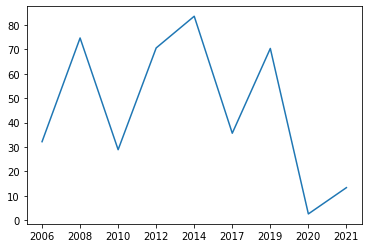

In [214]:
yearly_sentiment = data.groupby('album_year').sum().reset_index()
#visualize sentiment over the years
plt.plot(yearly_sentiment['album_year'], yearly_sentiment['compound'])
plt.show()